In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
name = 'bsm2'
influent = pd.read_csv(name + '_digester_influent_dyn.csv')
effluent = pd.read_csv(name + "_out_variables_dyn.csv")
gas = pd.read_csv(name + "_gas_flows_dyn.csv")

In [3]:
Rgas_m3_atm_K = 0.08205746e-3 # m^3*atm/(mol*K)
T_op = 35 + 273.15 # K
P_op = 1 # atm
V_liq = 3400 #m3


In [4]:
tspan = influent['time']
dfresults = pd.DataFrame()
for i in range(len(tspan)-1):
    index = i
    t = tspan[index]
    XT = effluent['X_xc'][index]+ effluent['X_ch'][index] + effluent['X_pr'][index] + effluent['X_li'][index]
    S1 = effluent['S_su'][index] + effluent['S_aa'][index] + effluent['S_fa'][index] 
    S2 = (effluent['S_va'][index]/208 + effluent['S_bu'][index]/160 + effluent['S_pro'][index]/112 + effluent['S_ac'][index]/64)*1000
    X1 = (effluent['X_su'][index] + effluent['X_aa'][index] + effluent['X_fa'][index])/1.55
    X2 = (effluent['X_ac'][index] + effluent['X_h2'][index] + effluent['X_c4'][index] + effluent['X_pro'][index])/1.55
    C = effluent['S_IC'][index]*1000
    Z = S2 + effluent['S_hco3_ion'][index]*1000
    CO2 = effluent['S_co2'][index]*1000
    B = effluent['S_hco3_ion'][index]*1000
    pH = effluent['pH'][index]
    
    q_C = gas['q_co2'][index]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    q_M = gas['q_ch4'][index]*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    p_C = gas['p_gas_co2'][index]*1.01325  
    results_iter = {'t': t, 'X_T': [XT], 'S_1': [S1], 'S_2': [S2], 'X_1': [X1], 'X_2': [X2], 'C': [C], 'Z': [Z], 'CO2': [CO2], 'B': [B], 'pH': [pH], 'p_C': [p_C], 'q_C': [q_C], 'q_CH4': [q_M]}
    dfresults = dfresults.append(pd.DataFrame(results_iter), ignore_index=True)

dfresults

,t,X_T,S_1,S_2,X_1,X_2,C,Z,CO2,B,pH,p_C,q_C,q_CH4
0,0.000000,0.468702,0.115891,3.367463,1.188627,1.062459,152.669423,146.137292,10.000000,142.769829,7.465550,0.000000,0.000000,0.000000
1,0.020833,0.468702,0.115891,3.367467,1.188627,1.062459,152.669612,146.137351,9.899727,142.769885,7.465544,0.367336,11.048782,19.834279
2,0.041667,0.468702,0.115891,3.367468,1.188627,1.062459,152.669957,146.137454,9.899971,142.769986,7.465533,0.367237,11.026019,19.798561
3,0.062500,0.468702,0.115891,3.367464,1.188627,1.062459,152.669818,146.137420,9.899863,142.769955,7.465538,0.367289,11.038251,19.817864
4,0.083333,0.468702,0.115891,3.367463,1.188627,1.062459,152.669688,146.137388,9.899763,142.769925,7.465542,0.367335,11.048499,19.833821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,189.901967,0.468735,0.115853,3.378083,1.188896,1.062688,152.831969,146.310219,9.899833,142.932136,7.466032,0.367401,11.063398,19.857117
9447,189.921967,0.468735,0.115853,3.378078,1.188895,1.062688,152.832338,146.310204,9.900213,142.932126,7.466016,0.367238,11.025327,19.797079
9448,189.941967,0.468735,0.115853,3.378064,1.188895,1.062687,152.831820,146.309936,9.899948,142.931872,7.466027,0.367354,11.052271,19.839511
9449,189.961967,0.468735,0.115853,3.378056,1.188895,1.062687,152.833671,146.310337,9.901391,142.932280,7.465965,0.366735,10.911597,19.618758


(0.01, 190.0)

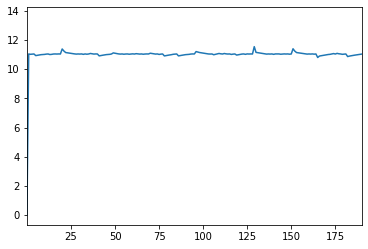

In [5]:
dfresults['q_C'].plot()
plt.xlim([0.01, 190])

In [21]:
p_atm =  1.013 #bar
R =  0.083145 #bar.M^-1.K^-1
k_p = 5 * 10 ** 4 #m^3.d^-1.bar^-1 #only for BSM2 AD conditions, recalibrate for other AD cases #gas outlet friction 
p_gas_h2o =  0.0313 * np.exp(5290 * (1 / 298.15 - 1 / T_op)) #bar #0.0557
tspan = influent['time']
dfresults = pd.DataFrame()
for i in range(len(tspan)-1):      
    t = tspan[i]
    XT = effluent['X_xc'][i]+ effluent['X_ch'][i] + effluent['X_pr'][i] + effluent['X_li'][i]
    S1 = effluent['S_su'][i] + effluent['S_aa'][i] + effluent['S_fa'][i] 
    S2 = (effluent['S_va'][i]/208 + effluent['S_bu'][i]/160 + effluent['S_pro'][i]/112 + effluent['S_ac'][i]/64)*1000
    X1 = (effluent['X_su'][i] + effluent['X_aa'][i] + effluent['X_fa'][i])/1.55
    X2 = (effluent['X_ac'][i] + effluent['X_h2'][i] + effluent['X_c4'][i] + effluent['X_pro'][i])/1.55
    C = effluent['S_IC'][i]*1000
    Z = S2 + effluent['S_hco3_ion'][i]*1000
    CO2 = effluent['S_co2'][i]*1000
    B = effluent['S_hco3_ion'][i]*1000
    pH = effluent['pH'][i]
    
    p_gas_h2 =  (effluent['S_gas_h2'][i]* R * T_op / 16)
    p_gas_ch4 =  (effluent['S_gas_ch4'][i] * R * T_op / 64)
    p_gas_co2 =  (effluent['S_gas_co2'][i] * R * T_op)
    p_gas =  (p_gas_h2 + p_gas_ch4 + p_gas_co2 + p_gas_h2o)
    q_gas =  (k_p * (p_gas- p_atm))
    if q_gas < 0:    
        q_gas = 0
  
    q_ch4 = q_gas * (p_gas_ch4/p_gas) # methane flow
    if q_ch4 < 0:
        q_ch4 = 0

    q_co2 = q_gas * (p_gas_co2/p_gas) # methane flow
    if q_co2 < 0:
        q_co2 = 0
    
    q_h2 = q_gas * (p_gas_h2/p_gas) # methane flow
    if q_h2 < 0:
        q_h2 = 0
    q_C = q_co2*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    q_M = q_ch4*P_op/(Rgas_m3_atm_K*T_op)/V_liq
    p_C = p_gas_co2*1.01325  
    results_iter = {'t': t, 'X_T': [XT], 'S_1': [S1], 'S_2': [S2], 'X_1': [X1], 'X_2': [X2], 'C': [C], 'Z': [Z], 'CO2': [CO2], 'B': [B], 'pH': [pH], 'p_C': [p_C], 'q_C': [q_C], 'q_CH4': [q_M]}
    dfresults = dfresults.append(pd.DataFrame(results_iter), ignore_index=True)
    


<AxesSubplot:>

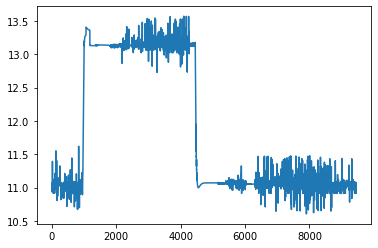

In [22]:
dfresults['q_C'].plot()


In [16]:
plt.plot(dfresults['t'], dfresults['q_C'].roun, label='qC')
plt.plot(dfresults['t'], dfresults['q_CH4'], label='qM')
plt.legend()
plt.ylabel('Gas flow rate (mmol/L/d)')
plt.xlabel('Time (d)')
plt.xlim([0, 190])


AttributeError: 'Series' object has no attribute 'roun'